<a href="https://colab.research.google.com/github/choco721/ICC.prueba/blob/Branch1/ICD_IrisData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del dataset Iris de UC Irvine Machine Learning Repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

In [17]:
import pandas as pd

df = pd.read_csv("IrisData.csv", names= ["sepal_lenght", "sepal_width", "petal_lenght", "petal_width", "species"])

In [18]:
df.head(10)

,sepal_lenght,sepal_width,petal_lenght,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


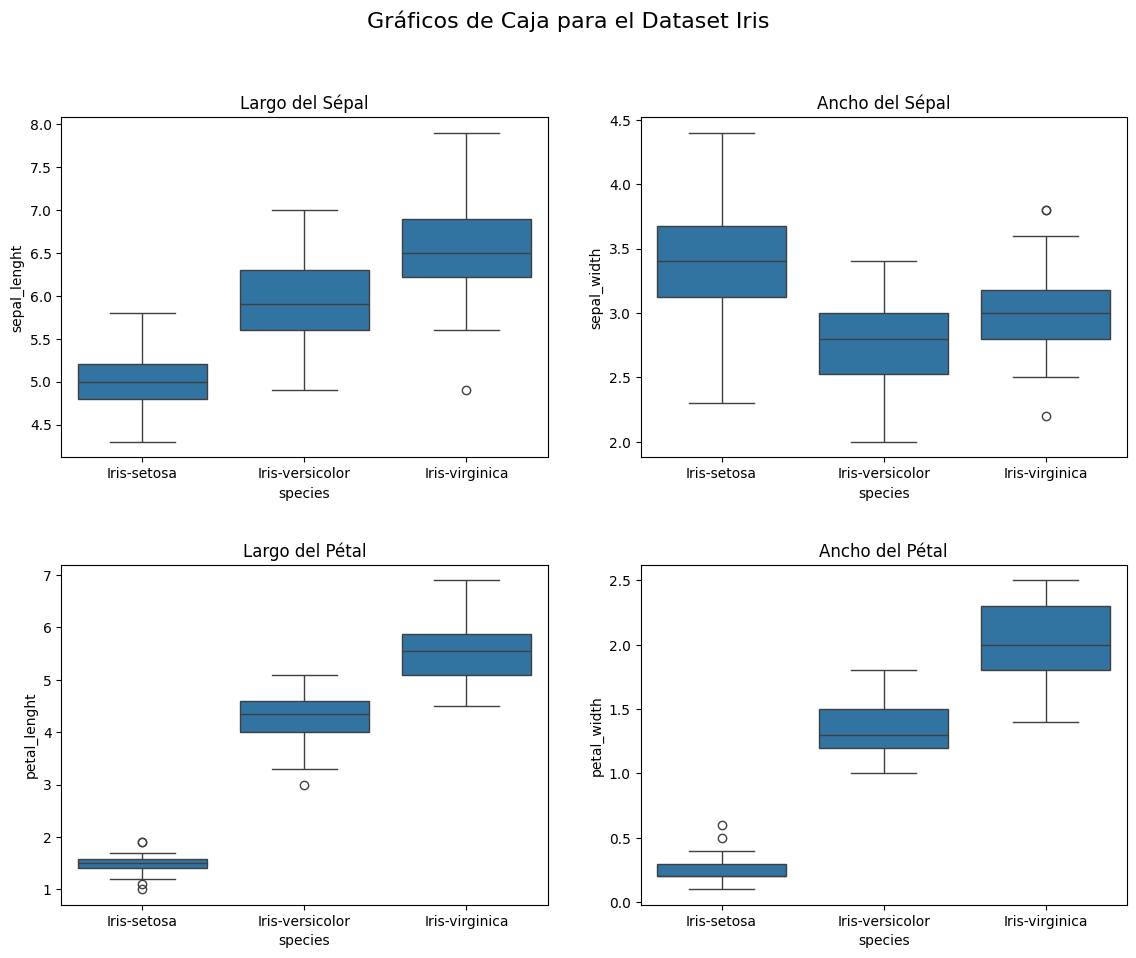

In [22]:
# Listar las diez primeras filas del dataset
df.head(10)

# Listar las diez primeras filas del dataset
df.describe()

# Configuración para la presentación de los gráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas de gráficos
fig.suptitle('Gráficos de Caja para el Dataset Iris', fontsize=16)  # Título general
# Crear gráficos de caja para cada columna numérica
sns.boxplot(x="species", y="sepal_lenght", data=df, ax=axes[0, 0])
axes[0, 0].set_title('Largo del Sépal')
sns.boxplot(x='species', y='sepal_width', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Ancho del Sépal')
sns.boxplot(x='species', y='petal_lenght', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Largo del Pétal')
sns.boxplot(x='species', y='petal_width', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Ancho del Pétal')
# Ajustar el diseño para evitar superposiciones
plt.tight_layout(pad=3.0)  # Espacio entre los gráficos
plt.show()  # Mostrar la presentación


In [24]:
# Separación de características y etiquetas
X = df[['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width']]
y = df['species']

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Creación del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamiento del modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Predicciones sobre el conjunto de datos de prueba
y_pred = knn.predict(X_test)

# Cálculo de la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 1.0


In [28]:
nombre_archivo = '/content/sample_data/modelo_knn.pkl'
with open(nombre_archivo, 'wb') as archivo:
 pickle.dump(knn, archivo)


In [29]:
# Cargar el modelo desde el archivo pickle
with open(nombre_archivo, 'rb') as archivo_cargado:
    modelo_cargado = pickle.load(archivo_cargado)


In [32]:
#8.	Función para validar los datos ingresados por el usuario:
def validar_datos(sepal_length, sepal_width, petal_length, petal_width):
  """
  Función para validar los datos ingresados por el usuario.

  Args:
    sepal_length: Valor ingresado para el largo del sépalo.
    sepal_width: Valor ingresado para el ancho del sépalo.
    petal_length: Valor ingresado para el largo del pétalo.
    petal_width: Valor ingresado para el ancho del pétalo.

  Returns:
    True si los datos son válidos, False en caso contrario.
  """
  if (sepal_length < 0 or sepal_length > 10) or \
     (sepal_width < 0 or sepal_width > 10) or \
     (petal_length < 0 or petal_length > 10) or \
     (petal_width < 0 or petal_width > 10):
    return False
  else:
    return True


In [34]:
#9.	Función para realizar la predicción de la especie de la flor:
def realizar_prediccion(sepal_length, sepal_width, petal_length, petal_width):
  """
  Función para realizar la predicción de la especie de la flor.

  Args:
    sepal_length: Valor ingresado para el largo del sépalo.
    sepal_width: Valor ingresado para el ancho del sépalo.
    petal_length: Valor ingresado para el largo del pétalo.
    petal_width: Valor ingresado para el ancho del pétalo.

  Returns:
    Especie predicha de la flor.
  """
  datos_flor = [sepal_length, sepal_width, petal_length, petal_width]
  prediccion = modelo_cargado.predict([datos_flor])

  return prediccion


In [36]:
# Solicitar el largo del sépalo
sepal_length = float(input("Ingrese el largo del sépalo (cm): "))

# Solicitar el ancho del sépalo
sepal_width = float(input("Ingrese el ancho del sépalo (cm): "))

# Solicitar el largo del pétalo
petal_length = float(input("Ingrese el largo del pétalo (cm): "))

# Solicitar el ancho del pétalo
petal_width = float(input("Ingrese el ancho del pétalo (cm): "))


Ingrese el largo del sépalo (cm): 4
Ingrese el ancho del sépalo (cm): 2
Ingrese el largo del pétalo (cm): 1
Ingrese el ancho del pétalo (cm): 5


In [38]:
# Validar los datos ingresados
if validar_datos(sepal_length, sepal_width, petal_length, petal_width):
  # Realizar la predicción
  especie_predicha = realizar_prediccion(sepal_length, sepal_width, petal_length, petal_width)
  print(f"Especie predicha: {especie_predicha}")
else:
  print("Error: Los valores ingresados deben estar entre 0 y 10")

print(sepal_length, sepal_width, petal_length, petal_width)


Especie predicha: ['Iris-versicolor']
4.0 2.0 1.0 5.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
